In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data 
from datetime import date

import acquire as acq
import prepare as prep

import env
import os

from sklearn.model_selection import train_test_split

In [ ]:
#reading from a pydata or seaborn dataset

In [15]:
iris = data('iris')

In [16]:
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [ ]:
#reading from a google sheet

In [45]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"

csv_export_url = sheet_url.replace("/edit#gid=" , "/export?format=csv&gid=")
df_google = pd.read_csv(csv_export_url) 

In [18]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
df_google.shape

(891, 12)

In [20]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
#new_sql_data_query will pull back proper data if info entered

iris= acq.new_sql_data_query(" SELECT species_id, species_name, sepal_length, sepal_width, petal_length, petal_width, measurement_id FROM measurements\
            JOIN species USING(species_id)" , acq.get_db_url("iris_db"))

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
iris.columns

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'measurement_id'],
      dtype='object')

In [36]:
def prep_iris(iris):
    iris = iris.drop(columns="species_name")
    iris = iris.drop(columns="measurement_id")
    iris["species"] = iris.species_id
    iris = iris.drop(columns="species_id")

    return iris

In [37]:
new_iris_data = prep_iris(iris)

In [39]:
new_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [40]:
titanic = acq.new_sql_data_query("select * from passengers" , acq.get_db_url("titanic_db"))

In [41]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [42]:
titanic = titanic.drop(columns="class")
titanic.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [46]:
#showing all unique values per column the long way:

for col in df_google.columns.to_list():
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [47]:
#showing all unique values per column the short way:

df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [48]:
df_train = pd.read_excel('train.xlsx', sheet_name='train')

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
iris_df = acq.new_sql_data_query("select * from measurements join species on measurements.species_id = species.species_id" , acq.get_db_url("iris_db"))

In [77]:
iris_df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [78]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_id      150 non-null    int64  
 7   species_name    150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [79]:
iris_df.drop(columns=["species_id"] , inplace=True)


In [80]:
iris_df.drop(columns=["measurement_id"] , inplace=True)

In [81]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
train_iris_df, validate_iris_df, test_iris_df = prep.split_function(iris_df, 'species_name')

In [83]:
train_iris_df.shape

(90, 5)

In [92]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train_iris_df.columns[:5]:
    print(col)
    if train_iris_df[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train_iris_df[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

sepal_length
sepal_width
petal_length
petal_width
species_name


In [94]:
col_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [95]:
col_cat

['species_name']

SPECIES_NAME
setosa        30
versicolor    30
virginica     30
Name: species_name, dtype: int64
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species_name, dtype: float64


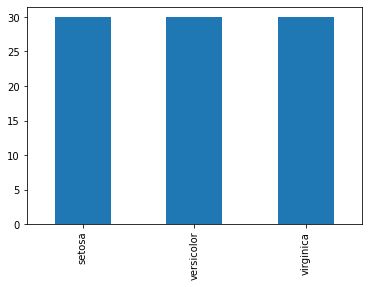

In [93]:
for col in col_cat:
    print(col.upper())
    print(train_iris_df[col].value_counts())
    print(train_iris_df[col].value_counts(normalize=True))
    train_iris_df[col].value_counts().plot.bar()
    plt.show()
    print()

SEPAL_LENGTH
6.4    7
5.0    7
5.8    6
5.7    6
6.3    5
5.4    5
6.9    4
5.5    4
5.9    3
5.1    3
6.7    3
6.5    3
4.8    3
5.6    3
7.2    3
6.0    3
4.9    3
6.1    2
5.2    2
6.2    2
4.6    2
4.7    1
4.5    1
7.9    1
6.6    1
5.3    1
7.4    1
4.4    1
7.0    1
6.8    1
7.3    1
7.7    1
Name: sepal_length, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


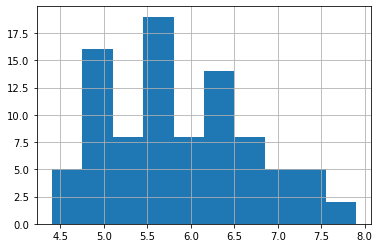

SEPAL_WIDTH
3.0    14
2.8     9
3.4     8
2.7     8
3.2     8
3.1     7
2.9     7
3.8     4
2.5     3
3.5     3
2.6     3
2.3     3
2.4     2
3.6     2
3.3     2
3.9     2
4.0     1
4.1     1
2.2     1
3.7     1
4.4     1
Name: sepal_width, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


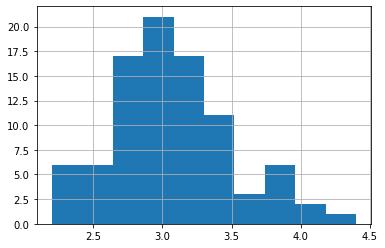

PETAL_LENGTH
1.5    7
5.1    6
1.6    6
1.4    5
5.6    4
1.3    4
4.2    4
4.5    4
1.7    4
3.9    3
5.8    3
4.6    3
4.0    3
6.0    2
4.1    2
6.1    2
4.3    2
5.2    2
1.9    2
4.9    2
4.7    2
1.2    2
5.3    2
4.8    2
5.5    2
5.0    1
3.5    1
5.7    1
6.3    1
6.9    1
3.7    1
5.4    1
4.4    1
6.4    1
3.3    1
Name: petal_length, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


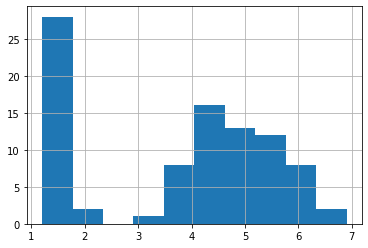

PETAL_WIDTH
0.2    15
1.3    10
1.8     9
1.5     7
0.4     6
2.3     5
1.2     4
1.0     4
0.3     4
1.4     3
2.1     3
0.1     3
1.9     3
1.6     3
2.2     2
2.0     2
2.4     2
2.5     2
1.1     1
0.6     1
0.5     1
Name: petal_width, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


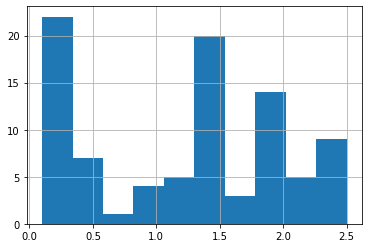

In [96]:
for col in col_num:
    print(col.upper())
    print(train_iris_df[col].value_counts())
    print(train_iris_df[col].hist())
    plt.show()

In [98]:
train_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
70,5.9,3.2,4.8,1.8,versicolor
123,6.3,2.7,4.9,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
3,4.6,3.1,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


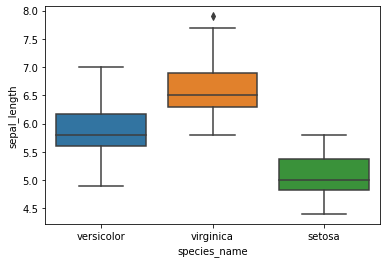

In [100]:
#does sepal length indecate species?

sns.boxplot(data=train_iris_df, x='species_name', y='sepal_length')
plt.show()

In [ ]:
#seems to

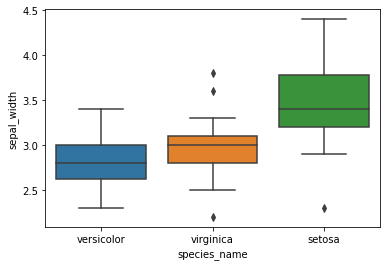

In [101]:
#does sepal width indecate species?
sns.boxplot(data=train_iris_df, x='species_name', y='sepal_width')
plt.show()

In [ ]:
#no

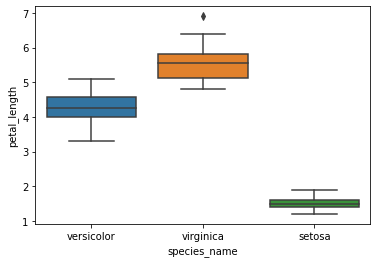

In [102]:
# does petal length indecate species?
sns.boxplot(data=train_iris_df, x='species_name', y='petal_length')
plt.show()

In [ ]:
#yes

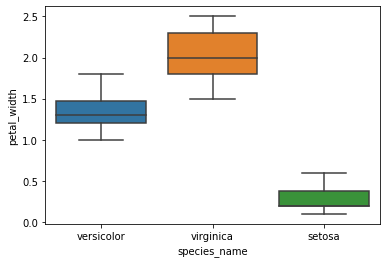

In [103]:
#does petal width indecate species?
sns.boxplot(data=train_iris_df, x='species_name', y='petal_width')
plt.show()

In [ ]:
#yes

In [ ]:
#run anova test on the petal stats then compare width and length in one graph then run the stats test

In [36]:
sql_query = "select * from customers \
        join contract_types using (contract_type_id) \
        join internet_service_types using (internet_service_type_id) \
        join payment_types using (payment_type_id)"
directory = os.getcwd()
url_for_query = acq.get_db_url("telco_churn")
filename = "new_telco_churn.csv"


In [37]:
telco_df = acq.get_sql_data(sql_query, directory, url_for_query, filename)

In [38]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [31]:
telco_df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [14]:
telco_df.info

<bound method DataFrame.info of      customer_id  gender  senior_citizen partner dependents  tenure  \
0     0002-ORFBO  Female               0     Yes        Yes       9   
1     0003-MKNFE    Male               0      No         No       9   
2     0004-TLHLJ    Male               0      No         No       4   
3     0011-IGKFF    Male               1     Yes         No      13   
4     0013-EXCHZ  Female               1     Yes         No       3   
...          ...     ...             ...     ...        ...     ...   
7038  9987-LUTYD  Female               0      No         No      13   
7039  9992-RRAMN    Male               0     Yes         No      22   
7040  9992-UJOEL    Male               0      No         No       2   
7041  9993-LHIEB    Male               0     Yes        Yes      67   
7042  9995-HOTOH    Male               0     Yes        Yes      63   

     phone_service    multiple_lines  internet_service_type_id  \
0              Yes                No             

In [32]:
def prep_telco(telco_df):
    telco_df = telco_df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})
    telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})
    telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})
    telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})
    telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})
    telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco_df[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection', 
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies', 
                                     'contract_type', 
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True)
    
    telco_df = pd.concat( [telco_df, dummy_df], axis=1 )
    
    telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

    return telco_df
        

In [39]:
fresh_telco = acq.get_sql_data(sql_query, directory, url_for_query, filename)

In [40]:
fresh_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [41]:
fresh_telco = prep_telco(fresh_telco)

In [47]:
fresh_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [44]:
train_telco, validate_telco, test_telco = prep.split_function(fresh_telco, 'churn')

In [54]:
train_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,1,0,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,1,1,0,1,0,1,0,0


In [49]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train_telco.columns[1:21]:
    print(col)
    if train_telco[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train_telco[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

gender
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
monthly_charges
total_charges
churn
contract_type
internet_service_type
payment_type


GENDER
Male      2149
Female    2076
Name: gender, dtype: int64
Male      0.508639
Female    0.491361
Name: gender, dtype: float64


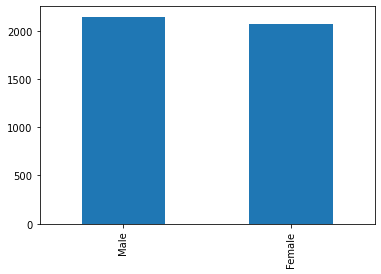


SENIOR_CITIZEN
0    3541
1     684
Name: senior_citizen, dtype: int64
0    0.838107
1    0.161893
Name: senior_citizen, dtype: float64


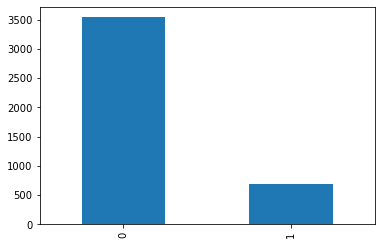


PARTNER
No     2161
Yes    2064
Name: partner, dtype: int64
No     0.511479
Yes    0.488521
Name: partner, dtype: float64


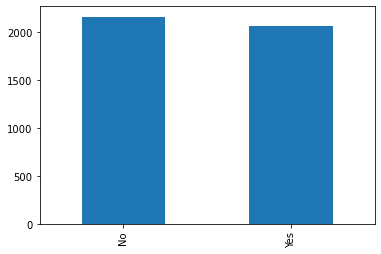


DEPENDENTS
No     2931
Yes    1294
Name: dependents, dtype: int64
No     0.693728
Yes    0.306272
Name: dependents, dtype: float64


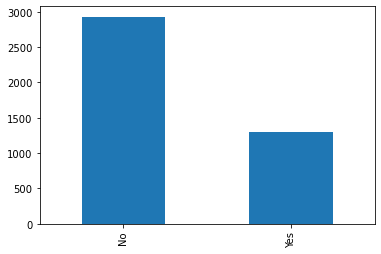


PHONE_SERVICE
Yes    3832
No      393
Name: phone_service, dtype: int64
Yes    0.906982
No     0.093018
Name: phone_service, dtype: float64


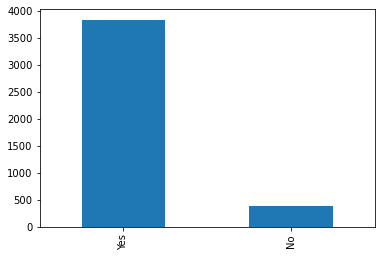


MULTIPLE_LINES
No                  2025
Yes                 1807
No phone service     393
Name: multiple_lines, dtype: int64
No                  0.479290
Yes                 0.427692
No phone service    0.093018
Name: multiple_lines, dtype: float64


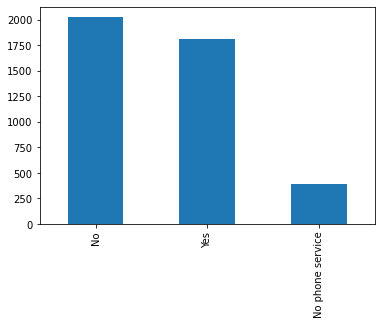


ONLINE_SECURITY
No                     2070
Yes                    1232
No internet service     923
Name: online_security, dtype: int64
No                     0.489941
Yes                    0.291598
No internet service    0.218462
Name: online_security, dtype: float64


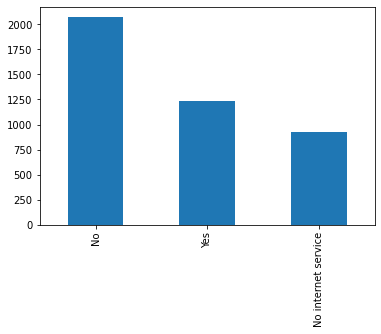


ONLINE_BACKUP
No                     1823
Yes                    1479
No internet service     923
Name: online_backup, dtype: int64
No                     0.431479
Yes                    0.350059
No internet service    0.218462
Name: online_backup, dtype: float64


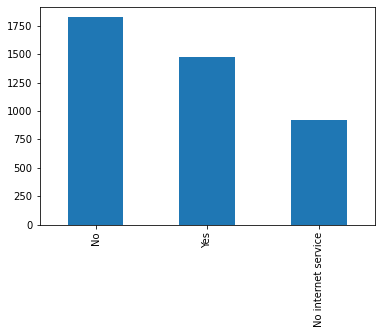


DEVICE_PROTECTION
No                     1819
Yes                    1483
No internet service     923
Name: device_protection, dtype: int64
No                     0.430533
Yes                    0.351006
No internet service    0.218462
Name: device_protection, dtype: float64


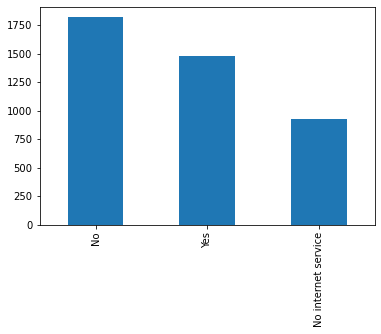


TECH_SUPPORT
No                     2079
Yes                    1223
No internet service     923
Name: tech_support, dtype: int64
No                     0.492071
Yes                    0.289467
No internet service    0.218462
Name: tech_support, dtype: float64


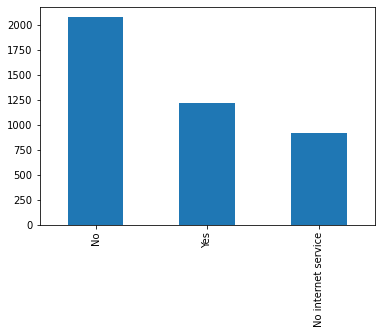


STREAMING_TV
Yes                    1657
No                     1645
No internet service     923
Name: streaming_tv, dtype: int64
Yes                    0.392189
No                     0.389349
No internet service    0.218462
Name: streaming_tv, dtype: float64


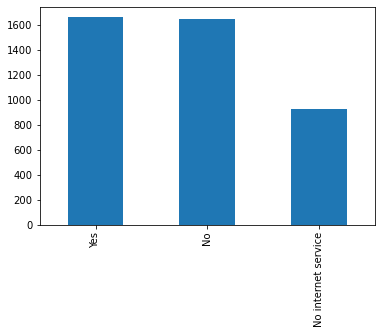


STREAMING_MOVIES
Yes                    1671
No                     1631
No internet service     923
Name: streaming_movies, dtype: int64
Yes                    0.395503
No                     0.386036
No internet service    0.218462
Name: streaming_movies, dtype: float64


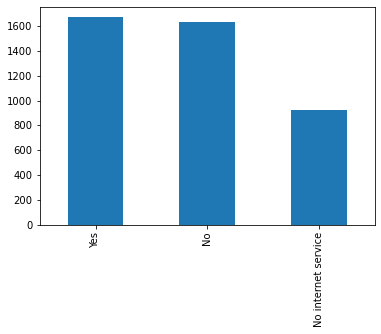


PAPERLESS_BILLING
Yes    2509
No     1716
Name: paperless_billing, dtype: int64
Yes    0.593846
No     0.406154
Name: paperless_billing, dtype: float64


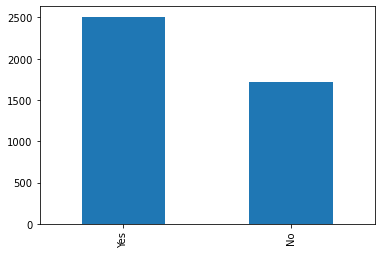


CHURN
No     3104
Yes    1121
Name: churn, dtype: int64
No     0.734675
Yes    0.265325
Name: churn, dtype: float64


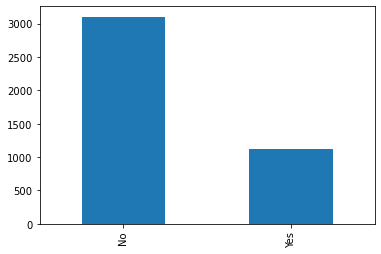


CONTRACT_TYPE
Month-to-month    2317
Two year           995
One year           913
Name: contract_type, dtype: int64
Month-to-month    0.548402
Two year          0.235503
One year          0.216095
Name: contract_type, dtype: float64


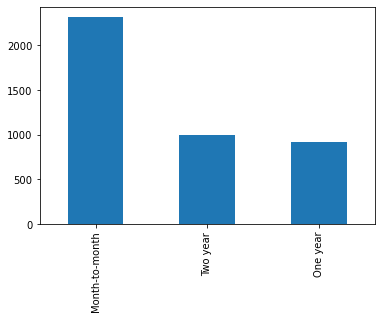


INTERNET_SERVICE_TYPE
Fiber optic    1855
DSL            1447
None            923
Name: internet_service_type, dtype: int64
Fiber optic    0.439053
DSL            0.342485
None           0.218462
Name: internet_service_type, dtype: float64


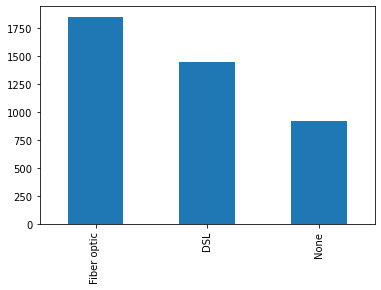


PAYMENT_TYPE
Electronic check             1423
Mailed check                  950
Bank transfer (automatic)     933
Credit card (automatic)       919
Name: payment_type, dtype: int64
Electronic check             0.336805
Mailed check                 0.224852
Bank transfer (automatic)    0.220828
Credit card (automatic)      0.217515
Name: payment_type, dtype: float64


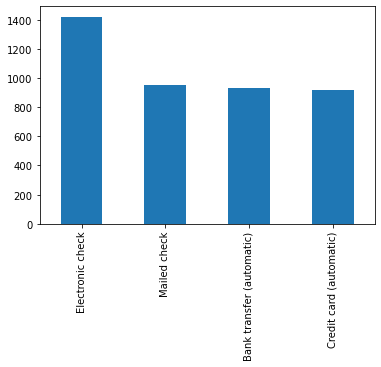

In [52]:
for col in col_cat:
    print(col.upper())
    print(train_telco[col].value_counts())
    print(train_telco[col].value_counts(normalize=True))
    train_telco[col].value_counts().plot.bar()
    plt.show()
    print()

TENURE
1     358
72    217
2     143
3     112
71    106
4     103
7      88
13     75
70     73
10     73
15     71
12     71
9      70
8      69
11     68
5      67
6      66
18     61
66     58
24     57
68     57
52     56
67     55
69     55
17     51
20     50
61     50
46     49
32     49
47     49
22     49
65     48
23     48
19     47
26     47
35     47
54     46
27     46
16     46
51     45
25     45
29     45
55     44
60     44
62     44
41     44
49     43
63     43
64     43
37     42
50     42
40     42
56     41
53     40
14     40
57     38
34     38
42     37
48     36
31     36
59     35
58     35
38     35
30     34
21     33
33     33
43     32
39     32
28     32
44     31
45     31
36     30
0       9
Name: tenure, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


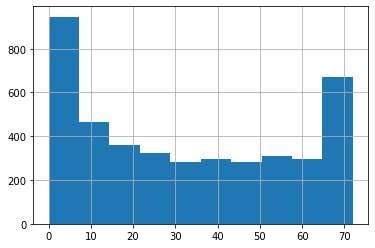

MONTHLY_CHARGES
20.05     36
19.85     35
19.90     31
19.65     29
20.00     28
          ..
26.80      1
101.50     1
104.25     1
92.45      1
103.80     1
Name: monthly_charges, Length: 1362, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


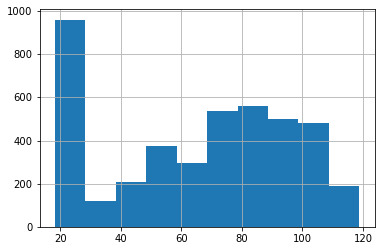

TOTAL_CHARGES
0.00       9
20.20      7
20.05      6
19.75      6
19.65      5
          ..
950.75     1
5638.30    1
3549.25    1
6096.45    1
7101.50    1
Name: total_charges, Length: 4015, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


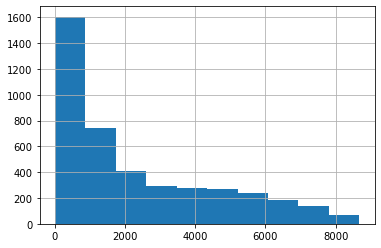

In [53]:
for col in col_num:
    print(col.upper())
    print(train_telco[col].value_counts())
    print(train_telco[col].hist())
    plt.show()

In [57]:
train_telco.head().T

,5911,2479,5889,6087,785
customer_id,8319-QBEHW,3547-LQRIK,8280-MQRQN,8626-PTQGE,1142-IHLOO
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,0,0,0
partner,No,Yes,No,No,No
dependents,Yes,No,No,No,No
tenure,26,47,1,69,51
phone_service,No,Yes,Yes,No,Yes
multiple_lines,No phone service,Yes,No,No phone service,No
online_security,No,No internet service,No,Yes,No
online_backup,Yes,No internet service,No,Yes,No


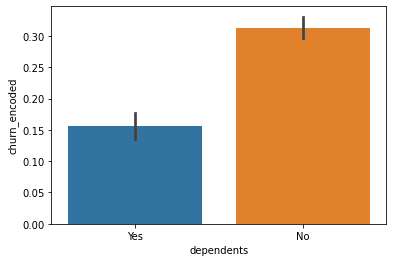

In [87]:
sns.barplot(data=train_telco, x='dependents', y='churn_encoded')
plt.show()

In [ ]:
#People with no children churn more

In [93]:
observed = pd.crosstab(train_telco.dependents, train_telco.churn_encoded)
observed

churn_encoded,0,1
dependents,,
No,2013,918
Yes,1091,203


In [94]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
#Null hypo rejected 

In [95]:
p

4.0728740930257814e-26

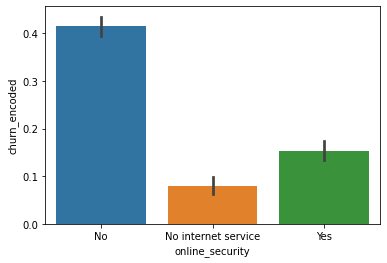

In [86]:
sns.barplot(data=train_telco, x='online_security', y='churn_encoded')
plt.show()

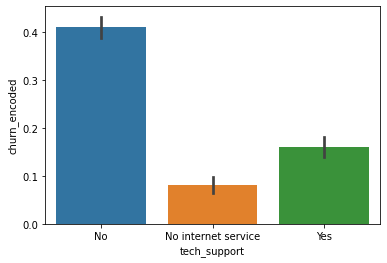

In [85]:
sns.barplot(data=train_telco, x='tech_support', y='churn_encoded')
plt.show()

In [ ]:
#People with no tech support churn more

In [96]:
observed = pd.crosstab(train_telco.tech_support, train_telco.churn_encoded)
observed

churn_encoded,0,1
tech_support,,
No,1227,852
No internet service,849,74
Yes,1028,195


In [97]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.3436559397518983e-99

In [ ]:
#Null hypo rejected 

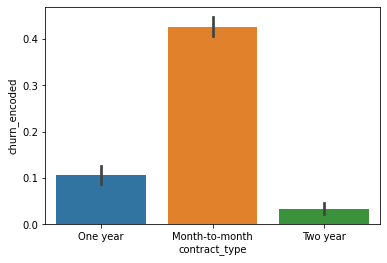

In [84]:
sns.barplot(data=train_telco, x='contract_type', y='churn_encoded')
plt.show()

In [ ]:
#Month to Month contracts churn more

In [98]:
observed = pd.crosstab(train_telco.contract_type, train_telco.churn_encoded)
observed

churn_encoded,0,1
contract_type,,
Month-to-month,1327,990
One year,815,98
Two year,962,33


In [99]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.4947896745220748e-153

In [ ]:
#null hypo rejected 

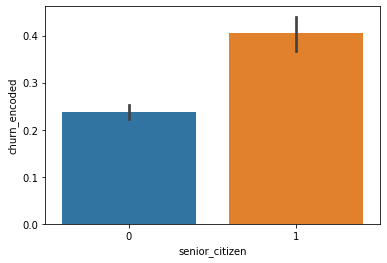

In [89]:
sns.barplot(data=train_telco, x='senior_citizen', y='churn_encoded')
plt.show()

In [ ]:
#Senior citizen churn at a higher rate

In [100]:
observed = pd.crosstab(train_telco.senior_citizen, train_telco.churn_encoded)
observed

churn_encoded,0,1
senior_citizen,,
0,2697,844
1,407,277


In [101]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

2.505662983276272e-19

In [ ]:
#Null hypo is rejected 

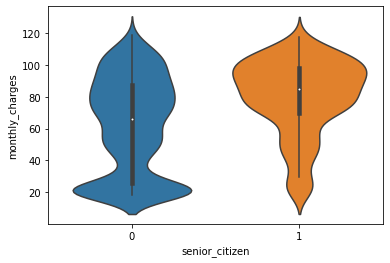

In [105]:
sns.violinplot(data=train_telco, x='senior_citizen', y='monthly_charges')
plt.show()

In [ ]:
#Senior citizens pay more

In [121]:
senior_citizen_no_monthly = train_telco[train_telco.senior_citizen == 0].monthly_charges
senior_citizen_yes_monthly = train_telco[train_telco.senior_citizen == 1].monthly_charges

In [107]:
t, p = stats.mannwhitneyu(senior_citizen_no_monthly, senior_citizen_yes_monthly)
p

3.989115859694976e-45

In [ ]:
# Null hypo rejected 

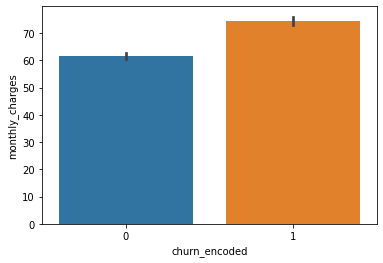

In [110]:
sns.barplot(data=train_telco, x='churn_encoded', y='monthly_charges')
plt.show()

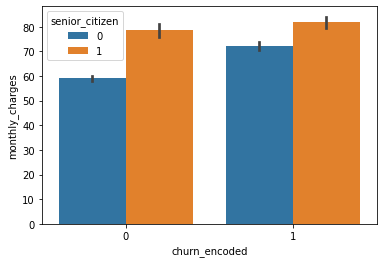

In [109]:
sns.barplot(data=train_telco, x='churn_encoded', y='monthly_charges', hue="senior_citizen")
plt.show()

In [ ]:
#Seniors pay more but it does not seem to be related to churn 

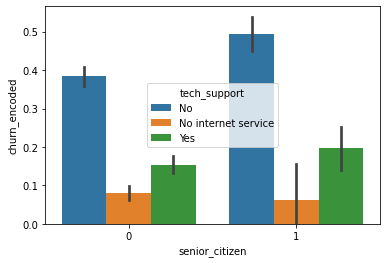

In [113]:
sns.barplot(data=train_telco, x='senior_citizen', y='churn_encoded' , hue="tech_support")
plt.show()

In [ ]:
#Tech support does have a relationship to senior churn

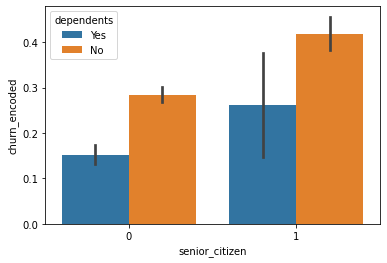

In [114]:
sns.barplot(data=train_telco, x='senior_citizen', y='churn_encoded' , hue="dependents")
plt.show()

In [ ]:
#People with without dependents churn at the same rate if your senior or not 